In [2]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import datasets
from torch.utils.data import DataLoader
import numpy
import matplotlib.pyplot as plt

In [3]:
dataset = datasets.MNIST('/Users/a14419009/Repos/NN_reload_stream2', download=True)

def collate_fn(data):
    pics = []
    target = []
    for item in data:

        pics.append(numpy.array(item[0]))
        target.append(item[1])
    return {
        'data': torch.from_numpy(numpy.array(pics)).float() / 255,
        'target': torch.from_numpy(numpy.array(target)),
    }

In [4]:
#hyper params
num_epoch = 1
cuda_device = -1
batch_size = 222
device = f'cuda:{cuda_device}' if cuda_device != -1 else 'cpu'

AutoEncoder

In [5]:
class Encoder(nn.Module):
    # 28*28 -> hidden -> out
    def __init__(self, in_chan, hidden_ch, out_channels):
        super().__init__()
        #conv2d -> maxpool2d -> conv2d -> maxpool2d -> conv2d
        self.conv1 = nn.Conv2d(in_chan, hidden_ch, kernel_size=5, stride=1, padding=2) # 28 x 28
        self.pool1 = nn.MaxPool2d(4, 4) # 14 x 14
        #self.conv2 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1, padding=1)  # 14 x 14
        #self.pool2 = nn.MaxPool2d(2, 2)  # 7 x 7
        self.conv3 = nn.Conv2d(hidden_ch, out_channels, kernel_size=3, stride=1, padding=1)

        self.activation = nn.ReLU()

    def forward(self, x): # -> 7x7
        x = self.activation(self.pool1(self.conv1(x)))
        #x = self.activation(self.pool2(self.conv2(x)))
        x = self.activation(self.conv3(x))

        return x

class Decoder(nn.Module):
    #conv2d -> upsampling2d -> conv2d -> upsampling2d -> conv2d
    def __init__(self, in_chan, hidden_ch, out_chan):
        super().__init__()
        self.conv1 = nn.Conv2d(in_chan, hidden_ch, kernel_size=3, stride=1, padding=1)  # 7 x 7
        self.upsample1 = nn.UpsamplingNearest2d(scale_factor=4)  # 14 x 14
        #self.conv2 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1, padding=1)  # 14 x 14
        #self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2)  # 28 x 28
        self.conv3 = nn.Conv2d(hidden_ch, out_chan, kernel_size=5, stride=1, padding=2)

        self.activation = nn.ReLU()

    def forward(self, x): # -> 28 x 28
        x = self.activation(self.upsample1(self.conv1(x)))
        #x = self.activation(self.upsample2(self.conv2(x)))
        x = self.activation(self.conv3(x))

        return x

In [6]:
class AutoEncoder(nn.Module):
    def __init__(self, input_ch, enc_hidden_ch, dec_hidden_ch, latent_ch):
        super().__init__()
        self.encoder = Encoder(input_ch, enc_hidden_ch, latent_ch)
        self.decoder = Decoder(latent_ch, dec_hidden_ch, input_ch)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)

        return x

In [7]:
model = AutoEncoder(1, 50, 40, 1)
model.train()
model.to(device)

optim = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.MSELoss()

In [8]:
for epoch in range(10):
    dataloader = DataLoader(
        dataset=dataset,
        collate_fn=collate_fn,
        batch_size=batch_size,
        shuffle=True,
        drop_last=True,
    )
    for step, batch in enumerate(dataloader):
        data = batch['data'].to(device).unsqueeze(1)
        optim.zero_grad()
        predict = model(data)
        loss = loss_func(predict, data)
        loss.backward()
        optim.step()
        if (step % 100 == 0):
            print(loss)
    print(f'epoch: {epoch}')

tensor(0.1054, grad_fn=<MseLossBackward0>)
tensor(0.0252, grad_fn=<MseLossBackward0>)
tensor(0.0191, grad_fn=<MseLossBackward0>)
epoch: 0
tensor(0.0175, grad_fn=<MseLossBackward0>)
tensor(0.0166, grad_fn=<MseLossBackward0>)
tensor(0.0165, grad_fn=<MseLossBackward0>)
epoch: 1
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.0144, grad_fn=<MseLossBackward0>)
tensor(0.0140, grad_fn=<MseLossBackward0>)
epoch: 2
tensor(0.0146, grad_fn=<MseLossBackward0>)
tensor(0.0133, grad_fn=<MseLossBackward0>)
tensor(0.0134, grad_fn=<MseLossBackward0>)
epoch: 3
tensor(0.0128, grad_fn=<MseLossBackward0>)
tensor(0.0130, grad_fn=<MseLossBackward0>)
tensor(0.0122, grad_fn=<MseLossBackward0>)
epoch: 4
tensor(0.0123, grad_fn=<MseLossBackward0>)
tensor(0.0133, grad_fn=<MseLossBackward0>)
tensor(0.0124, grad_fn=<MseLossBackward0>)
epoch: 5
tensor(0.0121, grad_fn=<MseLossBackward0>)
tensor(0.0113, grad_fn=<MseLossBackward0>)
tensor(0.0111, grad_fn=<MseLossBackward0>)
epoch: 6
tensor(0.0117, grad_fn=<MseLossBac

In [9]:
model.train()

with torch.no_grad():
    model.eval()
    test = dataset.data[200].unsqueeze(0).unsqueeze(0).float() / 255
    predict = model(test)

predict

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

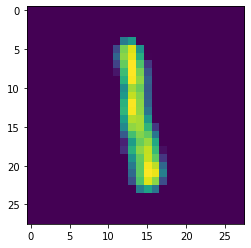

In [10]:
sample = predict.view(torch.squeeze(predict).size())

plt.imshow(sample.detach().numpy()/255)
plt.show()

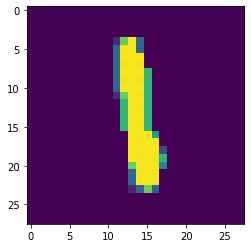

In [12]:
plt.imshow(dataset.data[200].detach().numpy())
plt.show()

AE denoising

In [13]:
model_1 = AutoEncoder(1, 50, 40, 1)
model_1.train()
model_1.to(device)

optim_1 = torch.optim.Adam(model_1.parameters(), lr=0.001)
loss_func_1 = nn.MSELoss()

In [14]:
for epoch in range(10):
    dataloader = DataLoader(
        dataset=dataset,
        collate_fn=collate_fn,
        batch_size=batch_size,
        shuffle=True,
        drop_last=True,
    )
    for step, batch in enumerate(dataloader):
        data = batch['data'].to(device).unsqueeze(1)
        data_noized = torch.clamp(data + 0.5 * torch.normal(torch.zeros_like(data), torch.ones_like(data)), 0., 1.)
        optim_1.zero_grad()
        predict = model_1(data_noized)
        loss = loss_func_1(predict, data)
        loss.backward()
        optim_1.step()
        if (step % 100 == 0):
            print(loss)
    print(f'epoch: {epoch}')

tensor(0.1124, grad_fn=<MseLossBackward0>)
tensor(0.1132, grad_fn=<MseLossBackward0>)
tensor(0.1146, grad_fn=<MseLossBackward0>)
epoch: 0
tensor(0.1108, grad_fn=<MseLossBackward0>)
tensor(0.1109, grad_fn=<MseLossBackward0>)
tensor(0.1090, grad_fn=<MseLossBackward0>)
epoch: 1
tensor(0.1068, grad_fn=<MseLossBackward0>)
tensor(0.1076, grad_fn=<MseLossBackward0>)
tensor(0.1162, grad_fn=<MseLossBackward0>)
epoch: 2
tensor(0.1073, grad_fn=<MseLossBackward0>)
tensor(0.1123, grad_fn=<MseLossBackward0>)
tensor(0.1067, grad_fn=<MseLossBackward0>)
epoch: 3
tensor(0.1137, grad_fn=<MseLossBackward0>)
tensor(0.1107, grad_fn=<MseLossBackward0>)
tensor(0.1100, grad_fn=<MseLossBackward0>)
epoch: 4
tensor(0.1090, grad_fn=<MseLossBackward0>)
tensor(0.1138, grad_fn=<MseLossBackward0>)
tensor(0.1076, grad_fn=<MseLossBackward0>)
epoch: 5
tensor(0.1172, grad_fn=<MseLossBackward0>)
tensor(0.1145, grad_fn=<MseLossBackward0>)
tensor(0.1134, grad_fn=<MseLossBackward0>)
epoch: 6
tensor(0.1109, grad_fn=<MseLossBac

In [15]:
model_1.train()

with torch.no_grad():
    model_1.eval()
    test = dataset.data[784].unsqueeze(0).unsqueeze(0).float() / 255
    test = torch.clamp(test + 0.5 * torch.normal(torch.zeros_like(test), torch.ones_like(test)), 0., 1.0)
    predict = model_1(test)
predict

tensor([[[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

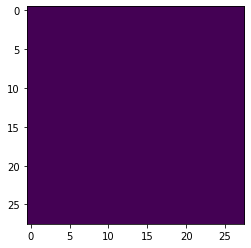

In [16]:
### Модель не распознала шум? Слишком долго выполняется код, нет возможности
#    покрутить модель. На изначальных параметрах модели тоже пустая картинка..
sample = predict.view(torch.squeeze(predict).size())

plt.imshow(sample.detach().numpy())
plt.show()

VAE

In [17]:
class Encoder(nn.Module):
    # 28*28 -> hidden -> out
    def __init__(self, in_chan, hidden_ch, out_channels):
        super().__init__()
        #conv2d -> maxpool2d -> conv2d -> maxpool2d -> conv2d
        self.conv1 = nn.Conv2d(in_chan, hidden_ch, kernel_size=7, stride=1, padding=3) # 28 x28
        self.pool1 = nn.MaxPool2d(2, 2) # 14 x 14
        self.conv2 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1, padding=1)  # 14 x 14
        self.pool2 = nn.AvgPool2d(2, 2)  # 7 x 7
        self.conv_mu = nn.Conv2d(hidden_ch, out_channels, kernel_size=4, stride=1, padding=2)
        self.conv_sigma = nn.Conv2d(hidden_ch, out_channels, kernel_size=3, stride=1, padding=1)

        self.activation = nn.ReLU()

    def forward(self, x): # -> 7x7
        x = self.activation(self.pool1(self.conv1(x)))
        x = self.activation(self.pool2(self.conv2(x)))
        mu = self.activation(self.conv_mu(x))
        sigma = torch.exp(self.conv_sigma(x))

        return mu, sigma


class Decoder(nn.Module):
    #conv2d -> upsampling2d -> conv2d -> upsampling2d -> conv2d
    def __init__(self, in_chan, hidden_ch, out_chan):
        super().__init__()
        self.conv1 = nn.Conv2d(in_chan, hidden_ch, kernel_size=3, stride=1, padding=1)  # 7 x 7
        self.upsample1 = nn.UpsamplingNearest2d(scale_factor=2)  # 14 x 14
        self.conv2 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1, padding=1)  # 14 x 14
        self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2)  # 28 x 28
        self.conv3 = nn.Conv2d(hidden_ch, out_chan, kernel_size=5, stride=1, padding=2)

        self.activation = nn.ReLU()

    def forward(self, x): # -> 28 x 28
        x = self.activation(self.upsample1(self.conv1(x)))
        x = self.activation(self.upsample2(self.conv2(x)))
        x = self.activation(self.conv3(x))

        return x

In [18]:
class AutoEncoder(nn.Module):
    def __init__(self, input_ch, enc_hidden_ch, dec_hidden_ch, latent_ch):
        super().__init__()
        self.encoder = Encoder(input_ch, enc_hidden_ch, latent_ch)
        self.decoder = Decoder(latent_ch, dec_hidden_ch, input_ch)

    def forward(self, x):
        mu, sigma = self.encoder(x)
        x = sampling(mu, sigma)
        x = self.decoder(x)

        return x, mu, sigma

In [19]:
# sampling
def sampling(mu, sigma):
    return mu + sigma * torch.normal(torch.zeros_like(sigma),
                                     torch.ones_like(sigma))


def collate_fn(data):
    pics = []
    target = []
    for item in data:

        pics.append(numpy.array(item[0]))
        target.append(item[1])
    return {
        'data': torch.from_numpy(numpy.array(pics)).float() / 255,
        'target': torch.from_numpy(numpy.array(target)),
    }


def kl_loss(mu, sigma):
    p = torch.distributions.Normal(mu, sigma)
    q = torch.distributions.Normal(torch.zeros_like(mu), torch.ones_like(sigma))

    return torch.distributions.kl_divergence(p, q).mean()

In [37]:
model2 = AutoEncoder(1, 50, 45, 1)
model2.train()
model2.to(device)

optim2 = torch.optim.Adam(model2.parameters(), lr=0.001)
criterion2 = nn.MSELoss()

In [38]:
for epoch in range(10):
    dataloader = DataLoader(
        dataset=dataset,
        collate_fn=collate_fn,
        batch_size=batch_size,
        shuffle=True,
        drop_last=True,
    )
    for step, batch in enumerate(dataloader):
        data = batch['data'].to(device).unsqueeze(1)
        optim2.zero_grad()
        
        predict, mu, sigma = model2(data)
        #loss
        kl = kl_loss(mu, sigma)
        crit_loss = criterion2(data, predict)
        loss = 0.1 * kl + crit_loss
        loss.backward()
        optim2.step()
        if (step % 100 == 0):
            print('kl_loss: {}, criterion_loss: {}'.format(kl.item(), crit_loss.item()))
    print(f'epoch: {epoch}')

kl_loss: 0.0014852631138637662, criterion_loss: 0.1130523830652237
kl_loss: 0.03134269267320633, criterion_loss: 0.07359606772661209
kl_loss: 0.02940024621784687, criterion_loss: 0.0704735666513443
epoch: 0
kl_loss: 0.027482330799102783, criterion_loss: 0.06930218636989594
kl_loss: 0.0398651659488678, criterion_loss: 0.0647791400551796
kl_loss: 0.04211898148059845, criterion_loss: 0.06369849294424057
epoch: 1
kl_loss: 0.048332203179597855, criterion_loss: 0.06467343866825104
kl_loss: 0.04849981144070625, criterion_loss: 0.06353256851434708
kl_loss: 0.04838209226727486, criterion_loss: 0.06373150646686554
epoch: 2
kl_loss: 0.04761927202343941, criterion_loss: 0.06309276819229126
kl_loss: 0.04830648750066757, criterion_loss: 0.06315804272890091
kl_loss: 0.05074344947934151, criterion_loss: 0.06296658515930176
epoch: 3
kl_loss: 0.05386507883667946, criterion_loss: 0.06321109086275101
kl_loss: 0.04931560531258583, criterion_loss: 0.06420785933732986
kl_loss: 0.05263017490506172, criterion_

In [54]:
with torch.no_grad():
    model.eval()
    test = dataset.data[784].unsqueeze(0).unsqueeze(0).float() / 255
    predict = model(test)
predict

(tensor([[[[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.

In [41]:
predict[0][0][0].size()

torch.Size([28, 28])

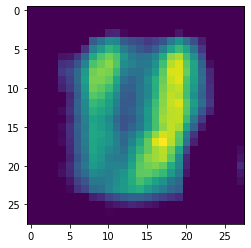

In [55]:
### Увеличение эпох с 2 до 10 только сделало четче ту же область,
#    код выполнялся около 1часа, VAE сильно мылит изображение. Необходимо уменьшить ядро в свертках?

plt.imshow(predict[0][0][0].detach().numpy())
plt.show()

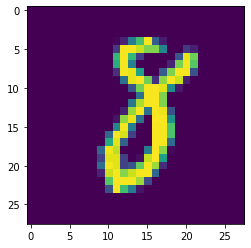

In [43]:
plt.imshow(test[0].view(28, 28).detach().numpy())
plt.show()